In [9]:
# install dependencies

! pip install matplotlib
! pip install seaborn
! pip install plotly
! pip install wordcloud
! pip install scipy


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# data cleaning

import pandas as pd
import numpy as np

print("Reading Excel File...")
data = pd.read_excel('E:\\Artificial Intelligence\\Data Analyst\\Project 1 - Tiktok\\Dataset\\tiktok_dataset.xlsx')  # Use read_excel instead of read_csv
print("Excel File Read Successfully!")

print("Checking for Missing Values...")
missing_values = data.isna()
print("Missing Values Found!")

print("Handling Missing Values...")
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
print("Missing Values Handled!")

print("Converting Data Types...")
data['createTimeISO'] = pd.to_datetime(data['createTimeISO']).dt.tz_localize(None)
print("Data Types Converted!")

print("Saving Cleaned Data...")
data.to_excel('E:\\Artificial Intelligence\\Data Analyst\\Project 1 - Tiktok\\Dataset\\cleaned_data.xlsx', index=False)  # Use to_excel instead of to_csv
print("Cleaned Data Saved!")

Reading Excel File...
Excel File Read Successfully!
Checking for Missing Values...
Missing Values Found!
Handling Missing Values...
Missing Values Handled!
Converting Data Types...
Data Types Converted!
Saving Cleaned Data...
Cleaned Data Saved!


In [12]:
# load the cleaned dataset

print("Reading Excel File...")
data = pd.read_excel('E:\\Artificial Intelligence\\Data Analyst\\Project 1 - Tiktok\\Dataset\\cleaned_data.xlsx')  # Use read_excel instead of read_csv
print("Excel File Read Successfully!")

Reading Excel File...
Excel File Read Successfully!


Reading Excel File...
Excel File Read Successfully!


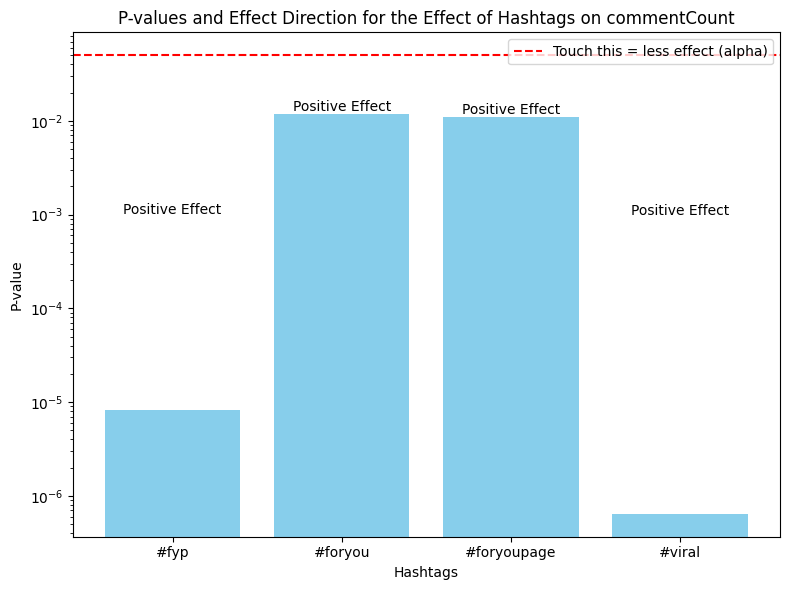

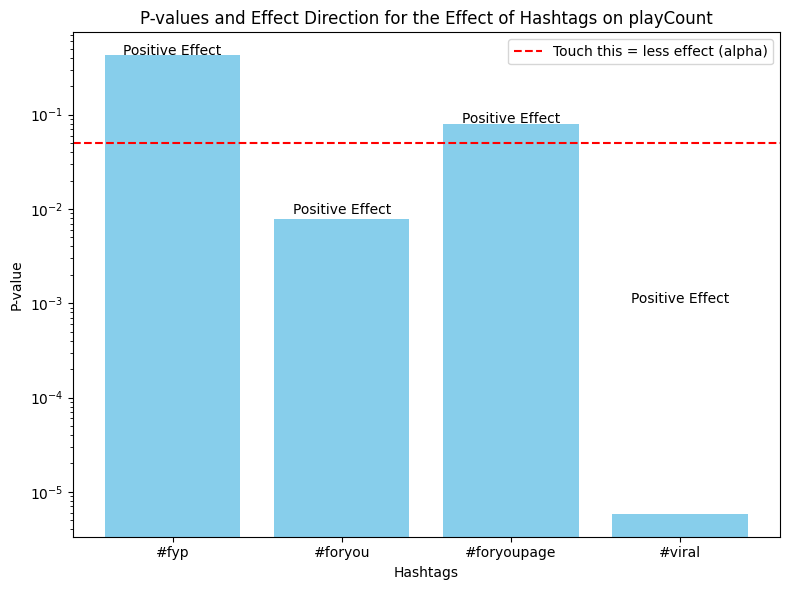

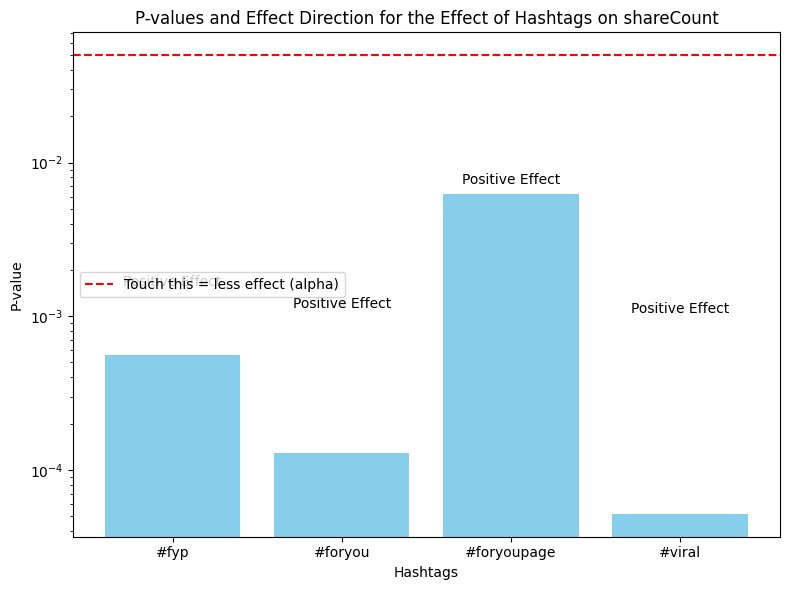

Reject the null hypothesis. The following hashtags have a significant effect on commentCount: #fyp (Positive Effect), #foryou (Positive Effect), #foryoupage (Positive Effect), #viral (Positive Effect).
Reject the null hypothesis. The following hashtags have a significant effect on playCount: #foryou (Positive Effect), #viral (Positive Effect).
Reject the null hypothesis. The following hashtags have a significant effect on shareCount: #fyp (Positive Effect), #foryou (Positive Effect), #foryoupage (Positive Effect), #viral (Positive Effect).


In [13]:
# 1
# Engagement metric vs top Hastag (#fyp, #foryou, #foryoupage, #viral)

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'commentCount', 'playCount', 'shareCount', and 'text'
print("Reading Excel File...")
data = pd.read_excel('E:\\Artificial Intelligence\\Data Analyst\\Project 1 - Tiktok\\Dataset\\cleaned_data.xlsx')
print("Excel File Read Successfully!")

# Define the engagement metrics for comparison
engagement_metrics = ['commentCount', 'playCount', 'shareCount']

# Define the hashtags to compare
hashtags_to_compare = ['#fyp', '#foryou', '#foryoupage', '#viral']

# Create an empty dictionary to store the results
results = {hashtag: {} for hashtag in hashtags_to_compare}

# Perform t-tests for each engagement metric and hashtag
for hashtag in hashtags_to_compare:
    videos_with_hashtag = data[data['text'].str.contains(hashtag, case=False, na=False)]
    videos_without_hashtag = data[~data['text'].str.contains(hashtag, case=False, na=False)]
    
    for metric in engagement_metrics:
        t_statistic, p_value = stats.ttest_ind(videos_with_hashtag[metric], videos_without_hashtag[metric], equal_var=False)
        results[hashtag][metric] = {
            'Test Statistic': t_statistic,
            'P-value': p_value,
            'Effect Direction': 'Positive' if t_statistic > 0 else 'Negative',
        }

alpha = 0.05  # Set the significance level

# Create a bar chart for each engagement metric
for metric in engagement_metrics:
    plt.figure(figsize=(8, 6))
    p_values = [results[hashtag][metric]['P-value'] for hashtag in hashtags_to_compare]
    effect_directions = [results[hashtag][metric]['Effect Direction'] for hashtag in hashtags_to_compare]
    
    plt.bar(hashtags_to_compare, p_values, color='skyblue')
    plt.xlabel('Hashtags')
    plt.ylabel('P-value')
    plt.title(f'P-values and Effect Direction for the Effect of Hashtags on {metric}')
    
    for i, direction in enumerate(effect_directions):
        plt.text(i, p_values[i] + 0.001, f'{direction} Effect', ha='center')
    
    plt.axhline(y=alpha, color='r', linestyle='--', label='Touch this = less effect (alpha)')
    plt.legend(loc='best')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

# Print significant effects
significant_effects = {metric: [] for metric in engagement_metrics}

for metric in engagement_metrics:
    for hashtag in hashtags_to_compare:
        if results[hashtag][metric]['P-value'] < alpha:
            significant_effects[metric].append(f"{hashtag} ({results[hashtag][metric]['Effect Direction']} Effect)")

for metric, hashtags in significant_effects.items():
    if hashtags:
        print(f'Reject the null hypothesis. The following hashtags have a significant effect on {metric}: {", ".join(hashtags)}.')
    else:
        print(f'Fail to reject the null hypothesis. No hashtag has a significant effect on {metric}.')


Correlation between Hashtags and PlayCount is none and very strong (Correlation Coefficient: nan)
Correlation between Using Original Music and PlayCount is positive and very weak (Correlation Coefficient: 0.06)


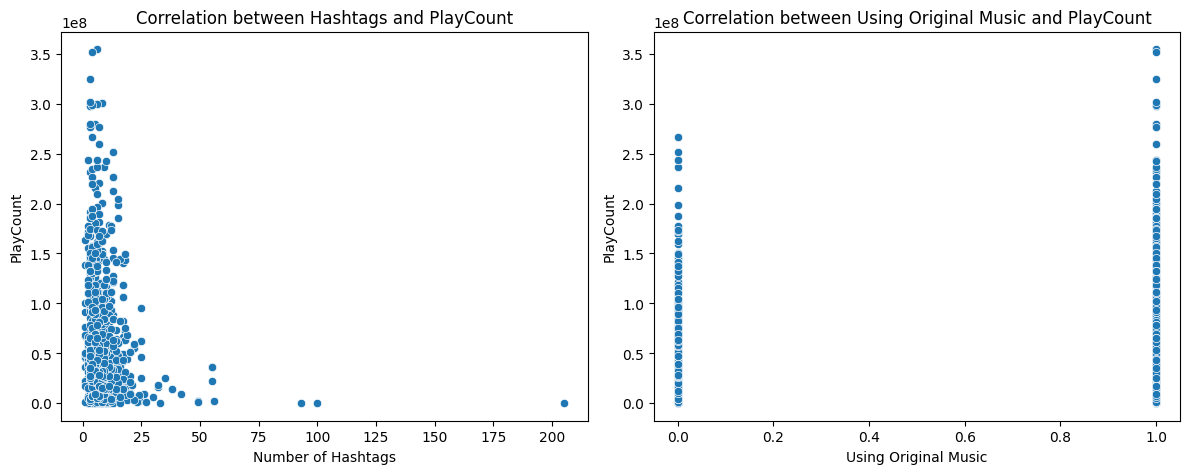

In [14]:
# 2
# Number of used hashtag vs playCount

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot for the correlation between the number of hashtags and playCount
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x=data['text'].str.count('#'), y=data['playCount'])
plt.title('Correlation between Hashtags and PlayCount')
plt.xlabel('Number of Hashtags')
plt.ylabel('PlayCount')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(data['text'].str.count('#'), data['playCount'])[0, 1]

# Determine if the correlation is positive, negative, or no correlation
correlation_direction = "positive" if correlation_coefficient > 0 else "negative" if correlation_coefficient < 0 else "none"

# Determine the strength of the correlation
correlation_strength = "very weak" if abs(correlation_coefficient) < 0.1 else "weak" if abs(correlation_coefficient) < 0.3 else "moderate" if abs(correlation_coefficient) < 0.5 else "strong" if abs(correlation_coefficient) < 0.7 else "very strong"

# Print the correlation information
print(f"Correlation between Hashtags and PlayCount is {correlation_direction} and {correlation_strength} (Correlation Coefficient: {correlation_coefficient:.2f})")

# Create a scatter plot for the correlation between using original music and playCount
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x=data['musicMeta/musicOriginal'], y=data['playCount'])
plt.title('Correlation between Using Original Music and PlayCount')
plt.xlabel('Using Original Music')
plt.ylabel('PlayCount')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(data['musicMeta/musicOriginal'], data['playCount'])[0, 1]

# Determine if the correlation is positive, negative, or no correlation
correlation_direction = "positive" if correlation_coefficient > 0 else "negative" if correlation_coefficient < 0 else "no"

# Determine the strength of the correlation
correlation_strength = "very weak" if abs(correlation_coefficient) < 0.1 else "weak" if abs(correlation_coefficient) < 0.3 else "moderate" if abs(correlation_coefficient) < 0.5 else "strong" if abs(correlation_coefficient) < 0.7 else "very strong"

# Print the correlation information
print(f"Correlation between Using Original Music and PlayCount is {correlation_direction} and {correlation_strength} (Correlation Coefficient: {correlation_coefficient:.2f})")

plt.tight_layout()
plt.show()


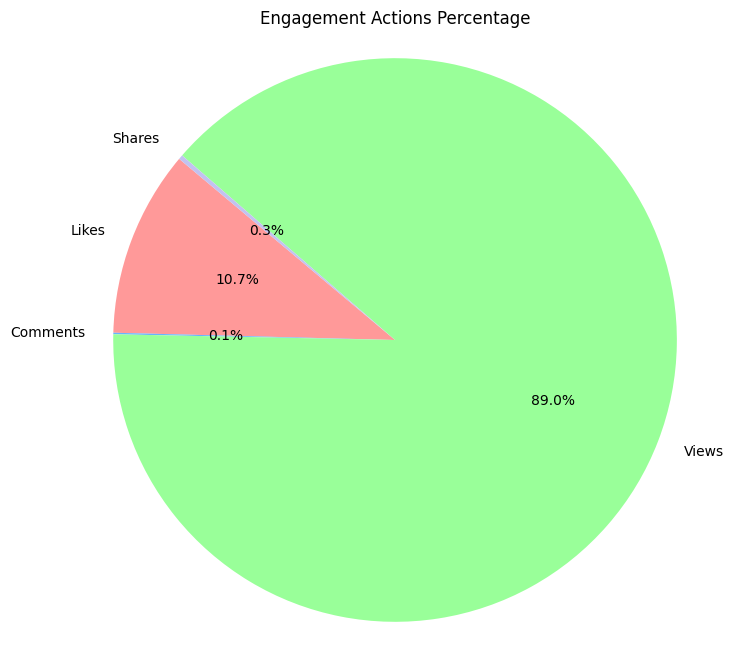

In [15]:
# 4
# Percentage of engagement metric in the total of dataset

import matplotlib.pyplot as plt

# Calculate the total engagement count (likes, comments, views, and shares)
total_likes = data['diggCount'].sum()
total_comments = data['commentCount'].sum()
total_views = data['playCount'].sum()
total_shares = data['shareCount'].sum()

# Calculate the total engagement actions
total_engagement_actions = total_likes + total_comments + total_views + total_shares

# Calculate the percentage of likes to shares
percentage_likes_to_shares = (total_likes / total_shares) * 100

engagement_counts = [total_likes, total_comments, total_views, total_shares]

# Define the engagement actions' labels
engagement_labels = ['Likes', 'Comments', 'Views', 'Shares']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(engagement_counts, labels=engagement_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0'])
plt.title('Engagement Actions Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


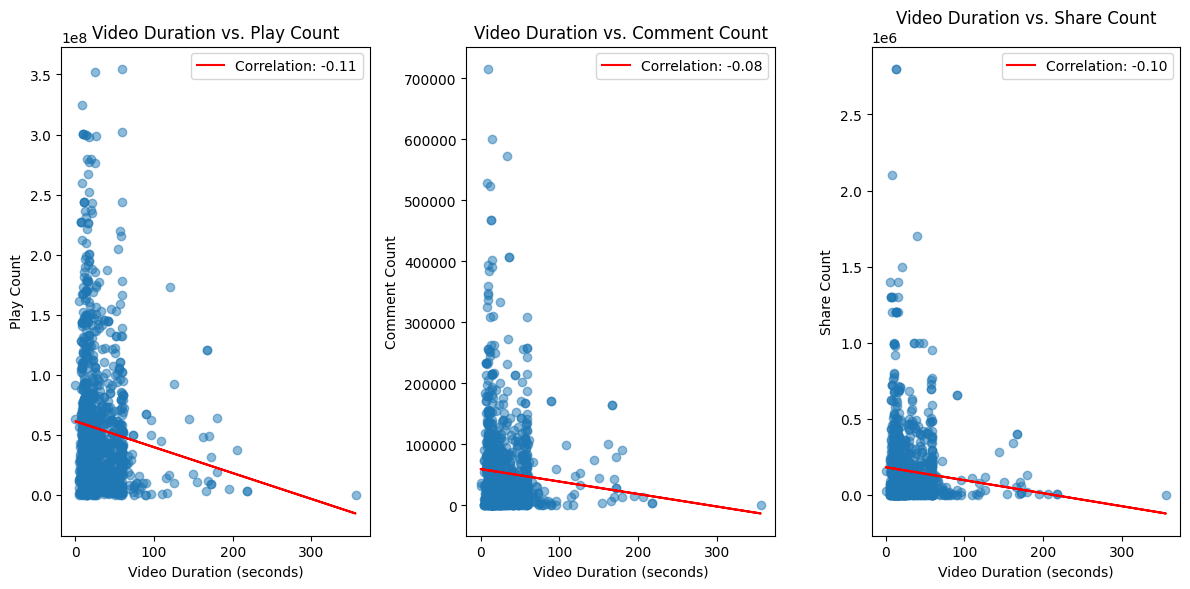

KeyError: 'P-value'

In [16]:
# 5
# Engagement vs video duration

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have a DataFrame 'data' with columns 'videoMeta/duration', 'playCount', 'commentCount', 'shareCount'

# Extract relevant data
video_duration = data['videoMeta/duration']
play_count = data['playCount']
comment_count = data['commentCount']
share_count = data['shareCount']

# Create scatter plots for each engagement metric with regression lines
plt.figure(figsize=(12, 6))

# Scatter plot for video duration vs. playCount
plt.subplot(1, 3, 1)
plt.scatter(video_duration, play_count, alpha=0.5)
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Play Count')
plt.title('Video Duration vs. Play Count')
slope, intercept, r_value, p_value, std_err = stats.linregress(video_duration, play_count)
line = slope * video_duration + intercept
plt.plot(video_duration, line, color='red', label=f'Correlation: {r_value:.2f}')
plt.legend()

# Scatter plot for video duration vs. commentCount
plt.subplot(1, 3, 2)
plt.scatter(video_duration, comment_count, alpha=0.5)
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Comment Count')
plt.title('Video Duration vs. Comment Count')
slope, intercept, r_value, p_value, std_err = stats.linregress(video_duration, comment_count)
line = slope * video_duration + intercept
plt.plot(video_duration, line, color='red', label=f'Correlation: {r_value:.2f}')
plt.legend()

# Scatter plot for video duration vs. shareCount
plt.subplot(1, 3, 3)
plt.scatter(video_duration, share_count, alpha=0.5)
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Share Count')
plt.title('Video Duration vs. Share Count')
slope, intercept, r_value, p_value, std_err = stats.linregress(video_duration, share_count)
line = slope * video_duration + intercept
plt.plot(video_duration, line, color='red', label=f'Correlation: {r_value:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print the results
for metric, result in results.items():
    if result['P-value'] < alpha:
        print(f'Reject the null hypothesis. Video duration has a significant effect on {metric}. P-value: {result["P-value"]}')
    else:
        print(f'Fail to reject the null hypothesis. Video duration does not have a significant effect on {metric}. P-value: {result["P-value"]}')



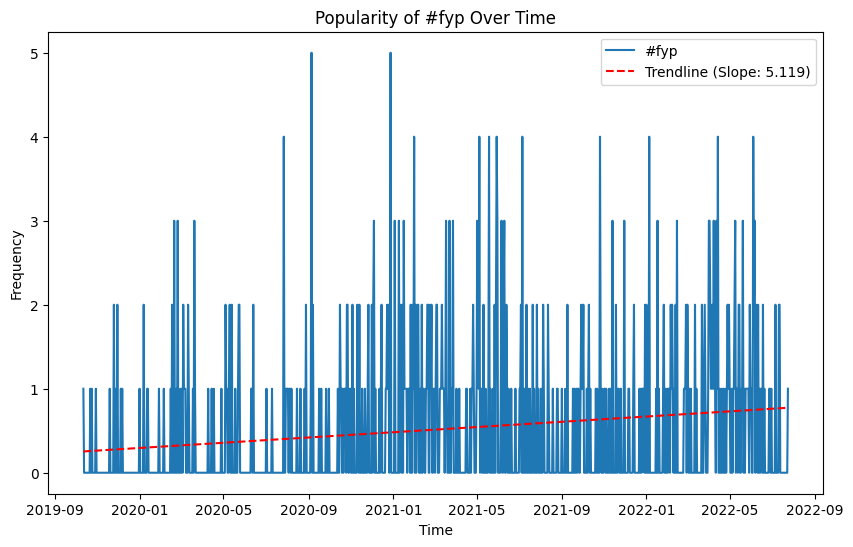

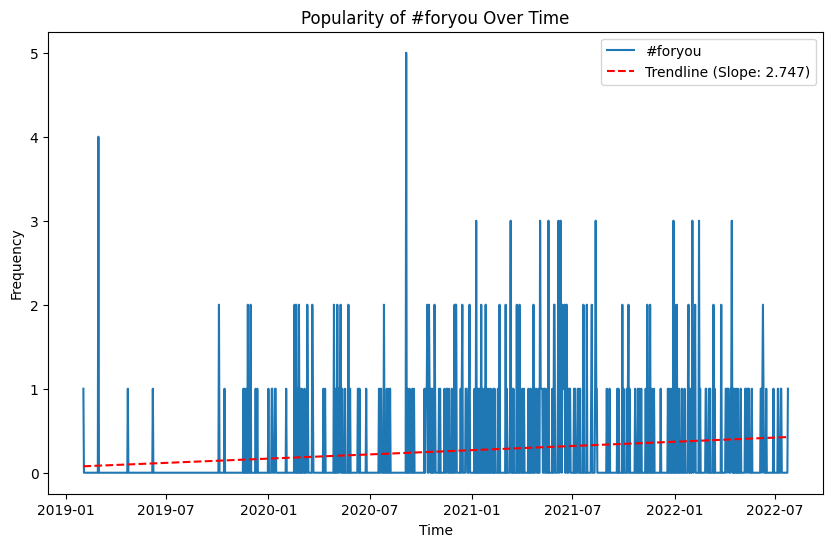

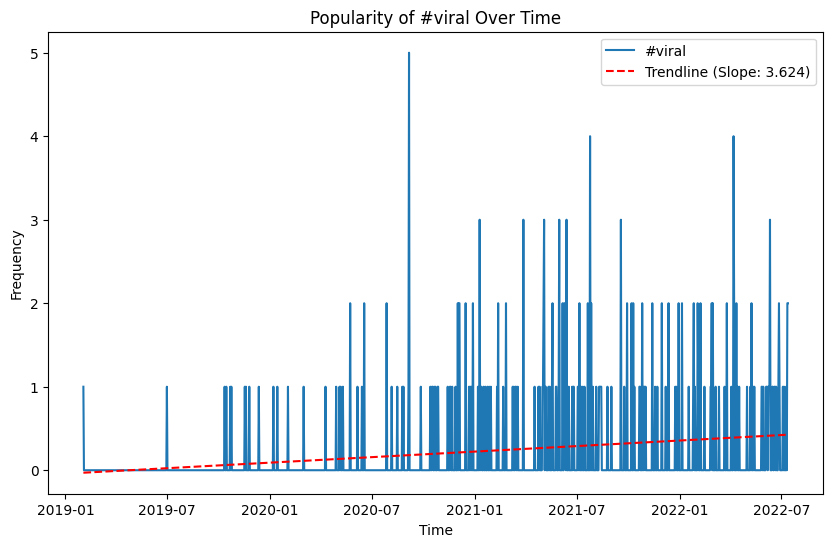

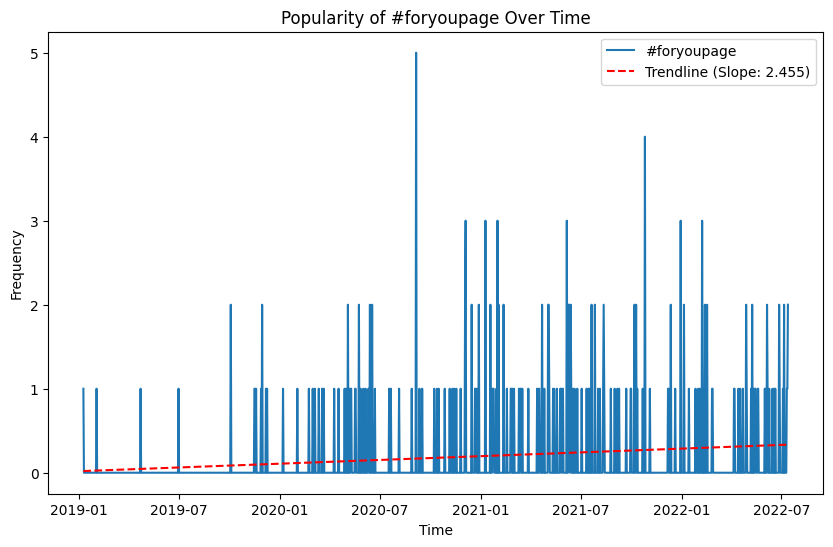

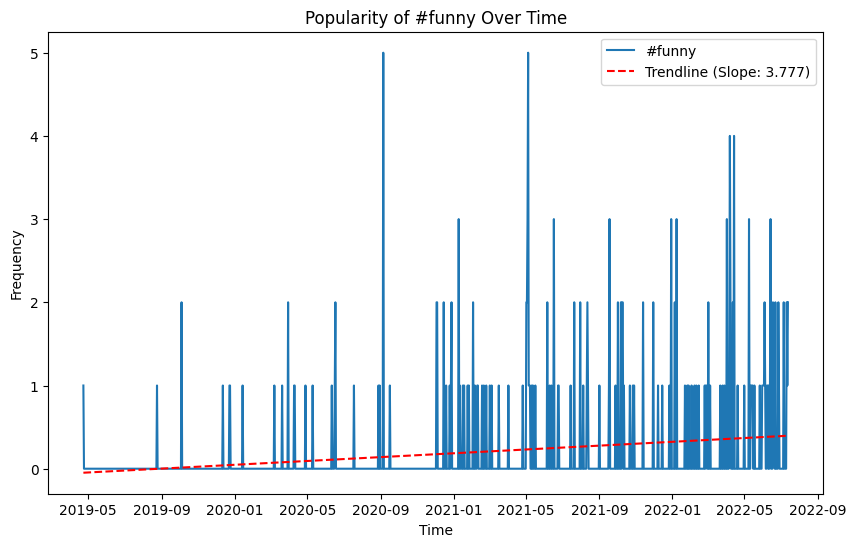

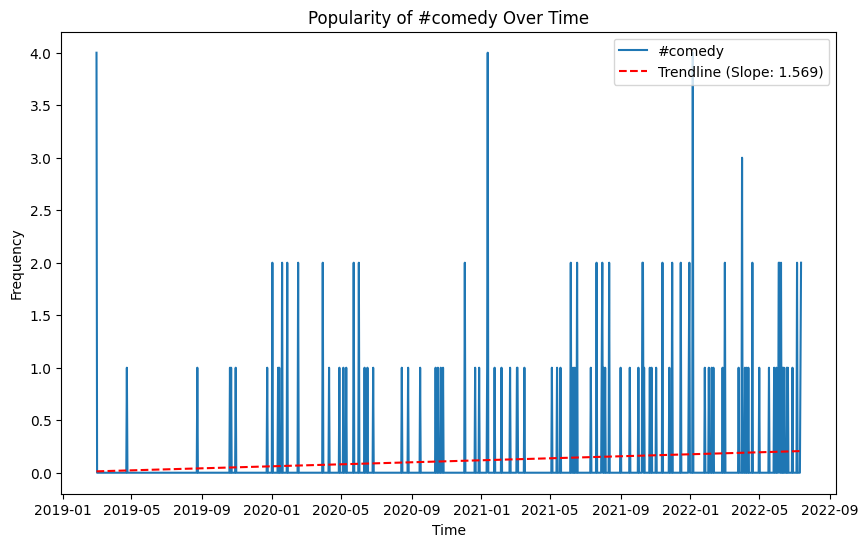

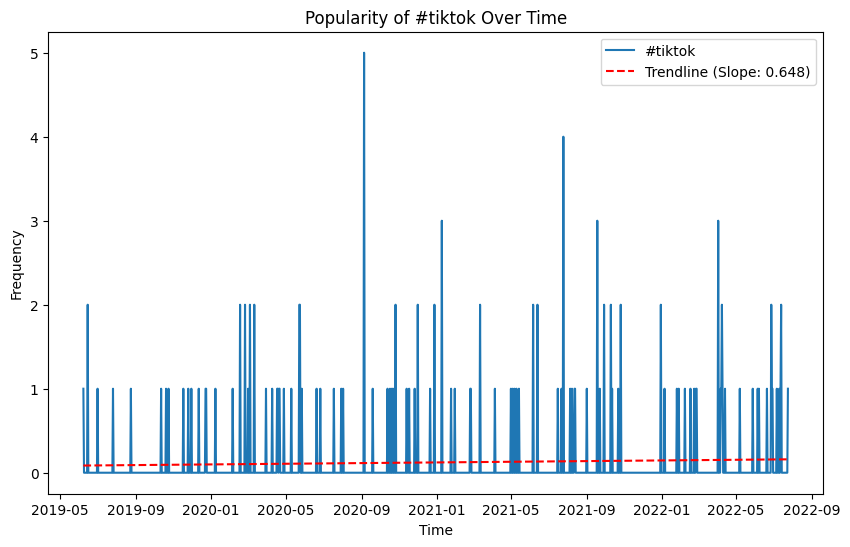

C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


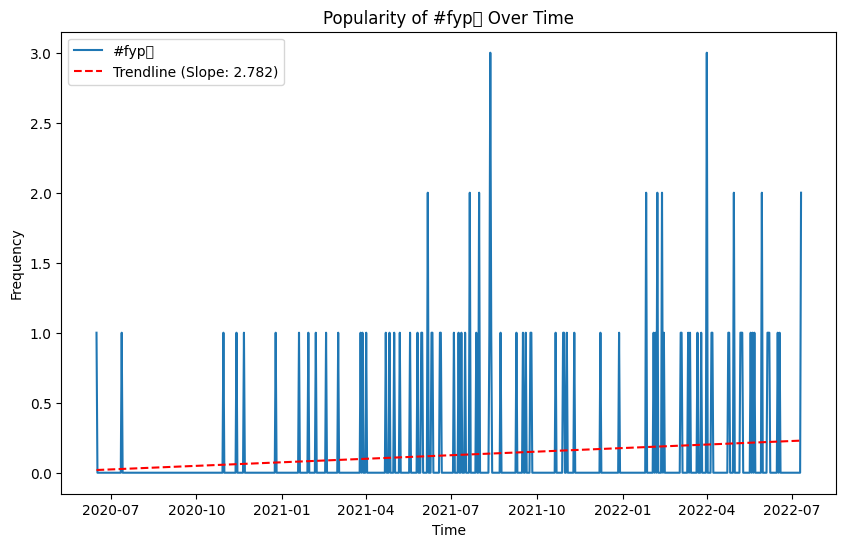

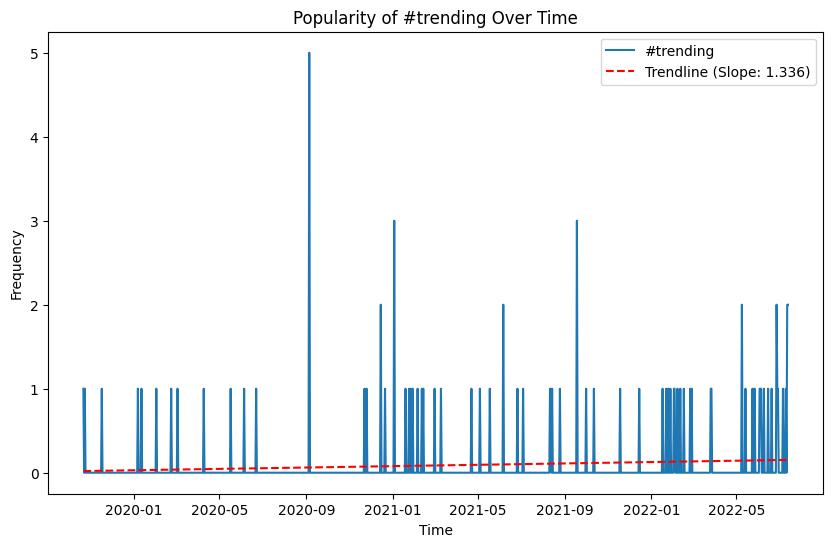

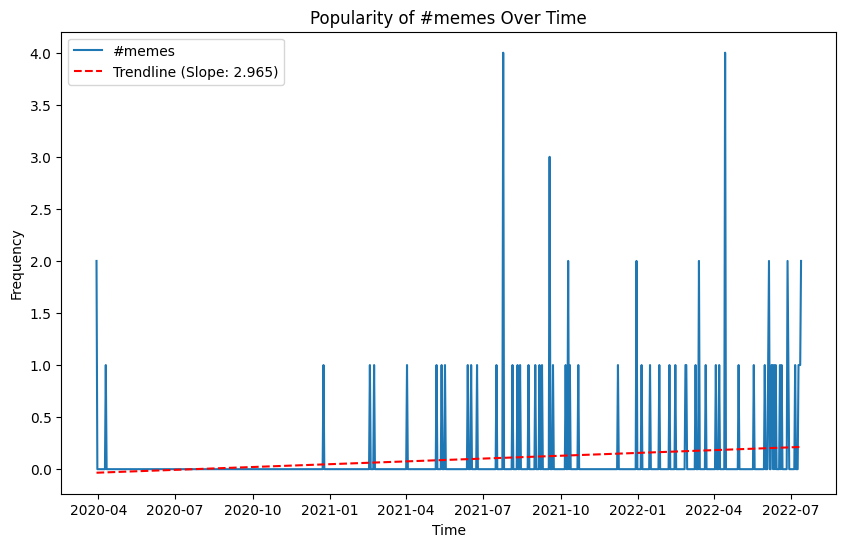

In [17]:
# 6
# Hashtag popularity time series

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Convert 'createTimeISO' to datetime
data['createTimeISO'] = pd.to_datetime(data['createTimeISO'])

# Extract hashtags from the 'text' column
hashtags = data['text'].str.extractall(r'#(\w+)')[0]

# Count the occurrences of each hashtag
hashtag_counts = hashtags.value_counts()

# Get the top 10 most used hashtags
top_10_hashtags = hashtag_counts.head(10).index

# Create a time series plot for each of the top 10 hashtags
for hashtag in top_10_hashtags:
    hashtag_data = data[data['text'].str.contains(fr'#\b{hashtag}\b', case=False, na=False)]
    grouped_data = hashtag_data.groupby(pd.Grouper(key='createTimeISO', freq='D'))
    aggregated_data = grouped_data.size()

    # Fit a linear trendline to the data
    x = np.arange(len(aggregated_data.index))
    y = aggregated_data.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Calculate the slope (angle) of the trendline
    slope = z[0] * 10000

    plt.figure(figsize=(10, 6))
    plt.plot(aggregated_data.index, aggregated_data.values, label=f'#{hashtag}')
    plt.plot(aggregated_data.index, p(x), linestyle='--', color='red', label=f'Trendline (Slope: {slope:.3f})')
    plt.title(f'Popularity of #{hashtag} Over Time')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.legend()

plt.show()


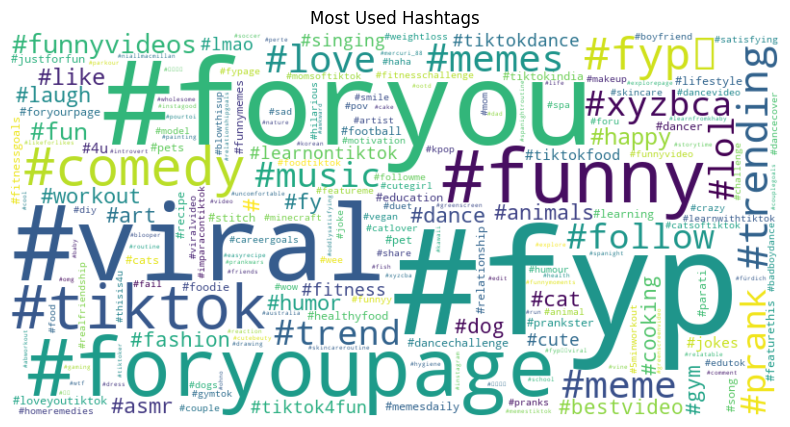

In [18]:
# 7 a
# Most frequently used hashtag 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'text' column

# Combine all the text into one string, converting to strings and filtering out NaN values
text = ' '.join(data['text'].astype(str).dropna())

# Extract hashtags from the text (words starting with #)
hashtags = [word for word in text.split() if word.startswith('#')]

# Create a dictionary to count the occurrences of each hashtag
hashtag_counts = {}
for hashtag in hashtags:
    hashtag = hashtag.lower()  # Convert to lowercase for consistency
    if hashtag in hashtag_counts:
        hashtag_counts[hashtag] += 1
    else:
        hashtag_counts[hashtag] = 1

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Used Hashtags")
plt.show()


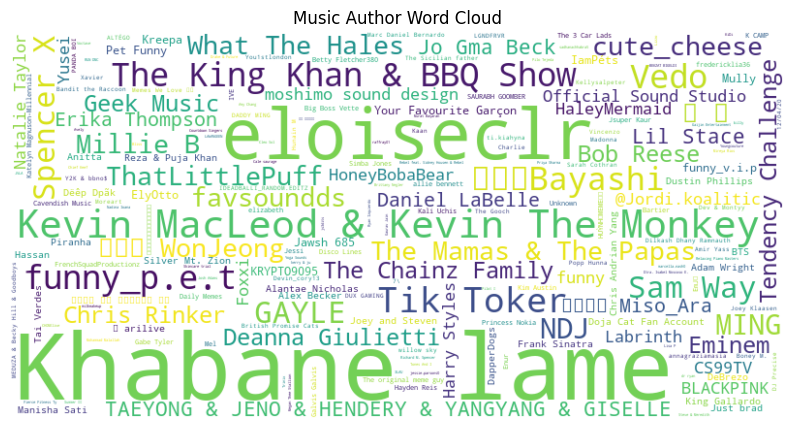

In [19]:
# 7 b
# Most requently music author

# Select the categorical column for hashtags
hashtags_column = 'musicMeta/musicAuthor'

# Calculate the frequency of each hashtag
hashtag_counts = data[hashtags_column].value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')

# Generate the word cloud using the hashtag counts
wordcloud.generate_from_frequencies(hashtag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Music Author Word Cloud")
plt.axis('off')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\379007068.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['createTimeISO'] = pd.to_datetime(filtered_data['createTimeISO'])


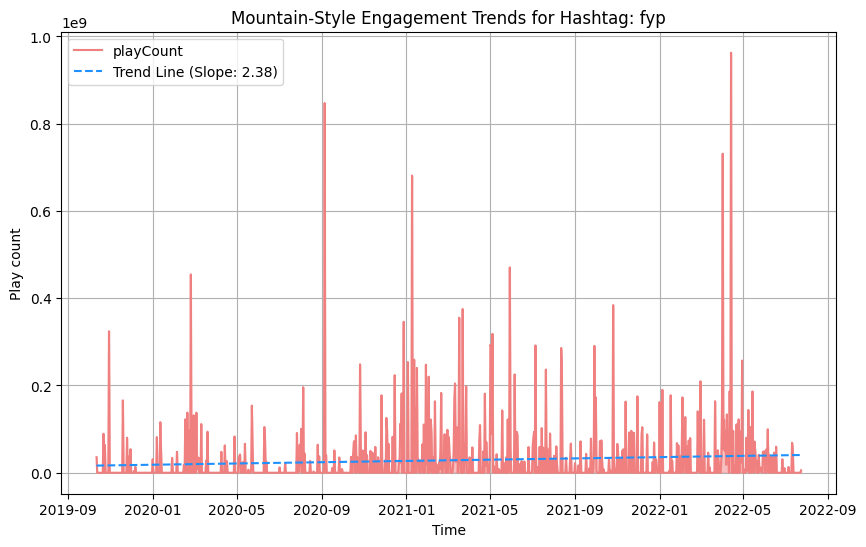

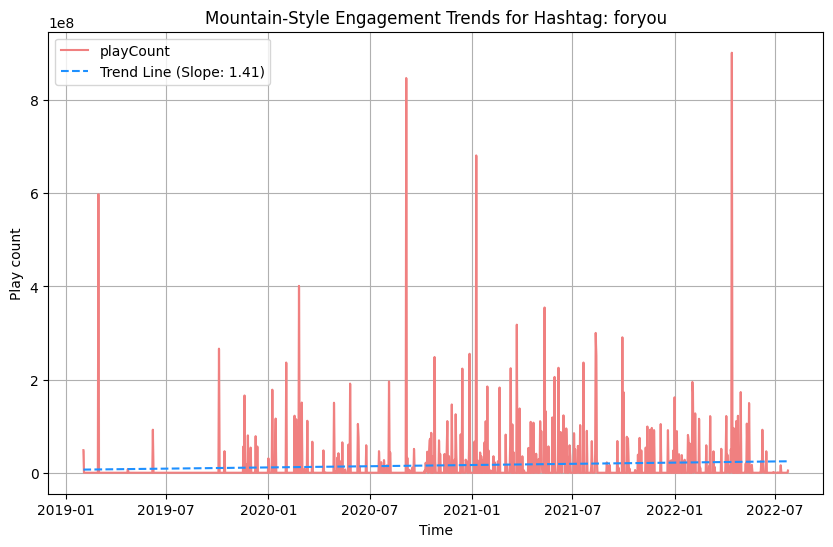

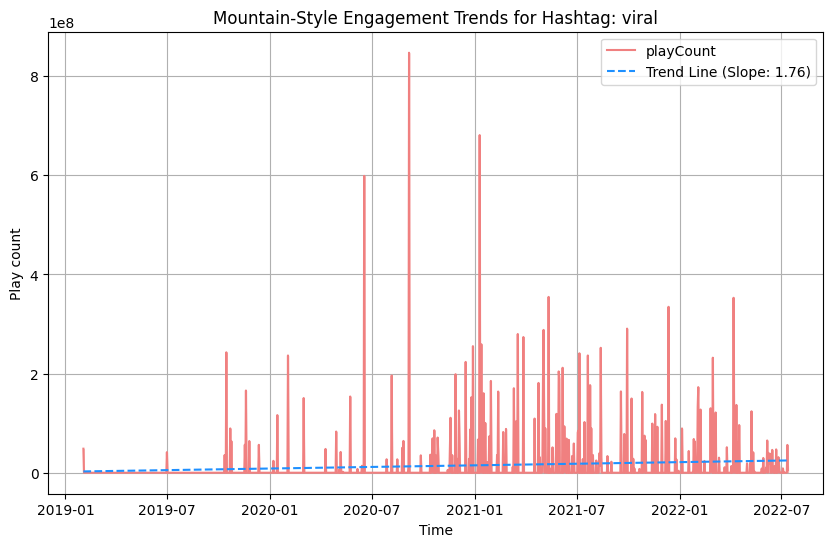

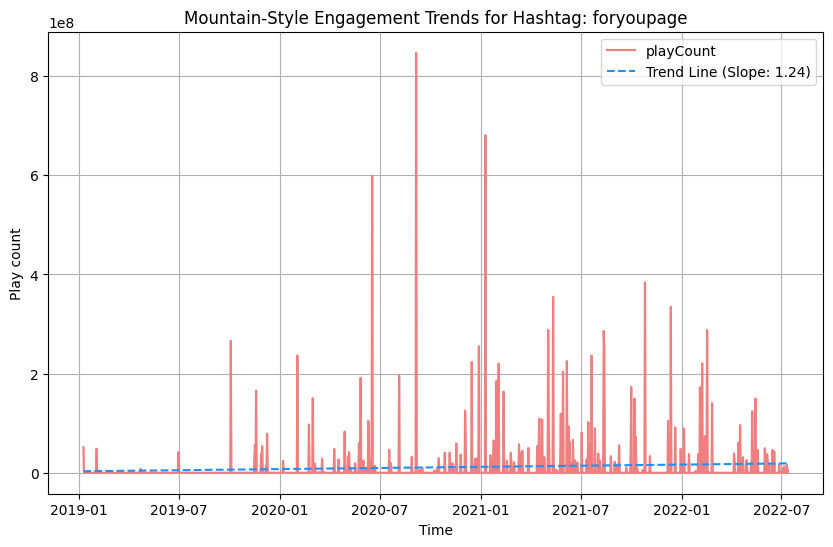

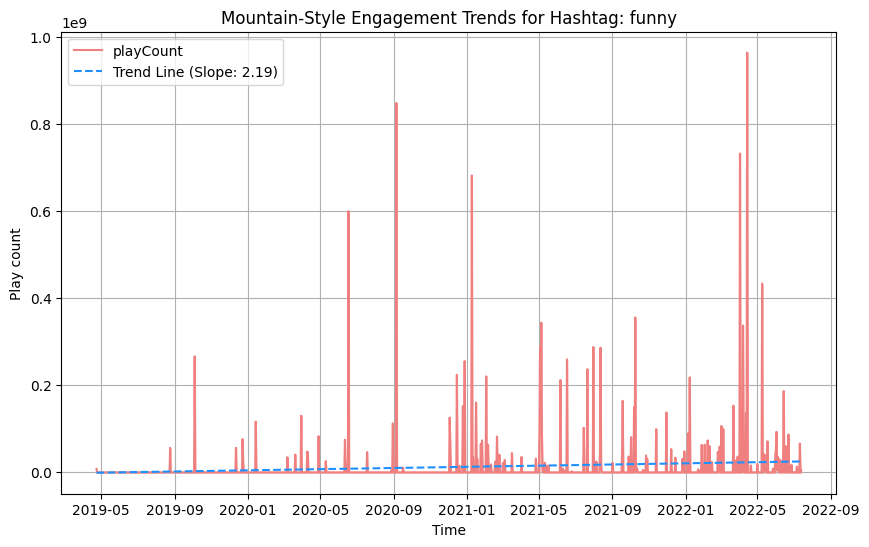

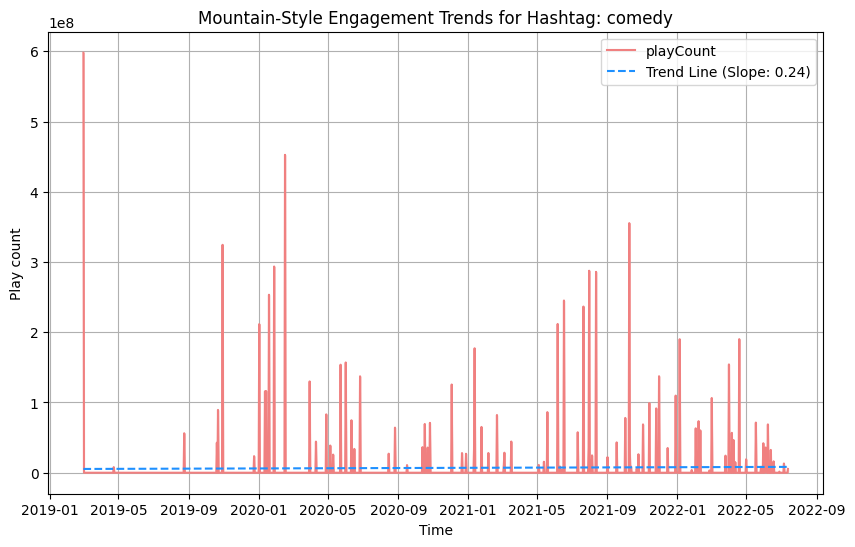

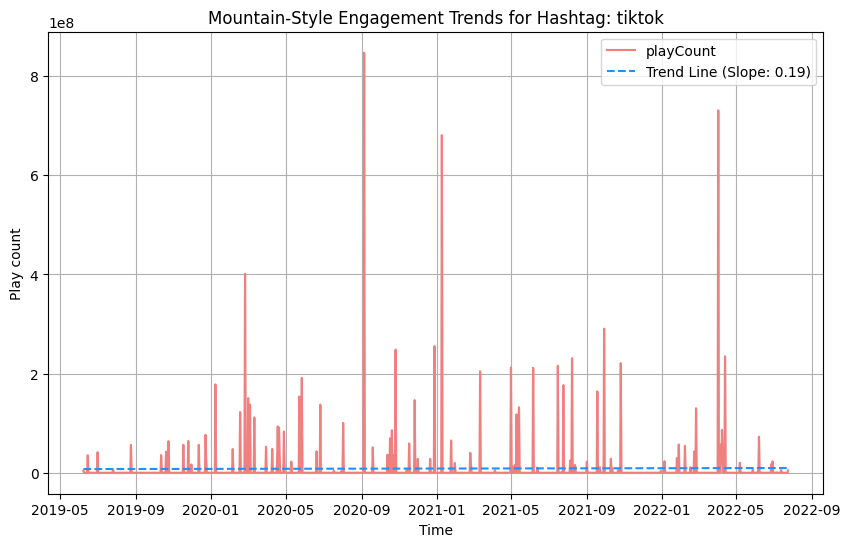

C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


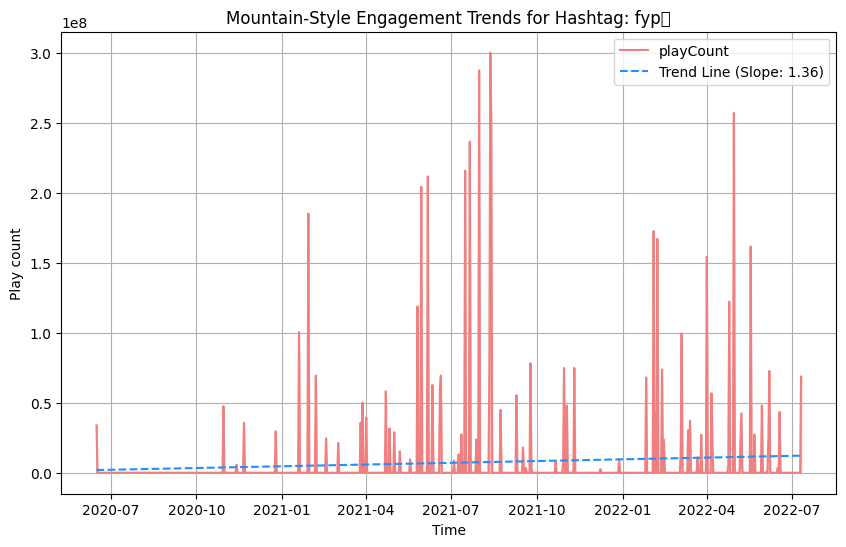

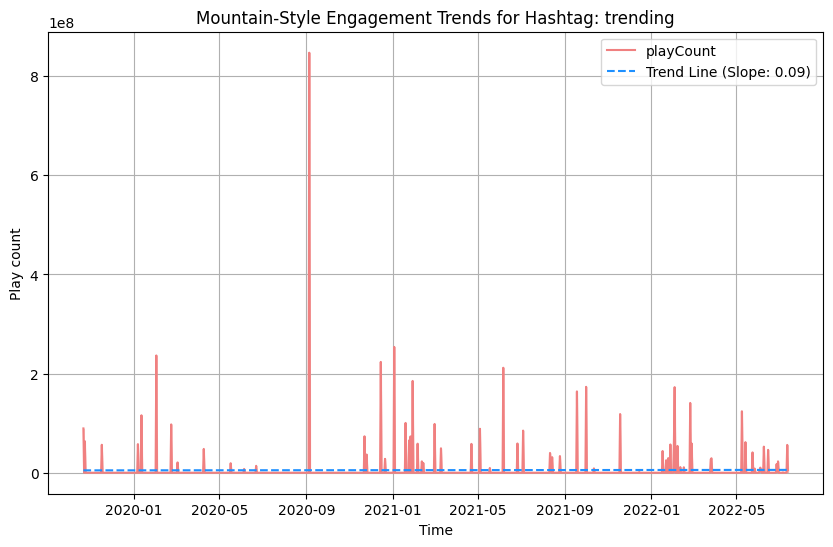

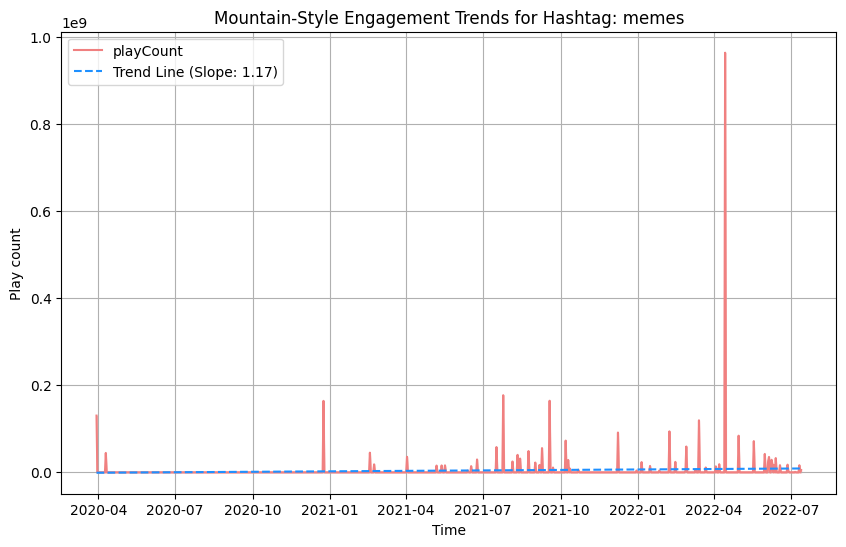

In [20]:
# 8
# Hashtag playCount time series

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract top 10 most common hashtags
top_10_hashtags = data['text'].str.extractall(r'#(\w+)')[0].value_counts().head(10).index.tolist()

# Filter data for top 10 hashtags
filtered_data = data[data['text'].str.contains('|'.join([fr'#\b{tag}\b' for tag in top_10_hashtags]), case=False, na=False)]

# Convert createTimeISO to datetime
filtered_data['createTimeISO'] = pd.to_datetime(filtered_data['createTimeISO'])

# Create mountain-style line graphs with filled areas and trend lines
for hashtag in top_10_hashtags:
    hashtag_data = filtered_data[filtered_data['text'].str.contains(fr'#\b{hashtag}\b', case=False, na=False)]

    grouped_data = hashtag_data.groupby(pd.Grouper(key='createTimeISO', freq='D'))

    # Calculate total engagement metrics for each group
    aggregated_data = grouped_data[['playCount']].sum()

    plt.figure(figsize=(10, 6))

    # Create the mountain-style line plot
    plt.plot(aggregated_data.index, aggregated_data['playCount'], label='playCount', color='lightcoral')

    # Fill the area under the lines
    plt.fill_between(aggregated_data.index, aggregated_data['playCount'], color='lightcoral', alpha=0.5)

    # Calculate and add the trend line
    x = np.arange(len(aggregated_data))
    y = aggregated_data['playCount'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Calculate the slope
    slope = z[0] / 10000 # Multiply by 100,000

    plt.plot(aggregated_data.index, p(x), linestyle='--', color='dodgerblue', label=f'Trend Line (Slope: {slope:.2f})')

    plt.title(f'Mountain-Style Engagement Trends for Hashtag: {hashtag}')
    plt.xlabel('Time')
    plt.ylabel('Play count')
    plt.legend()
    plt.grid(True)
    plt.show()


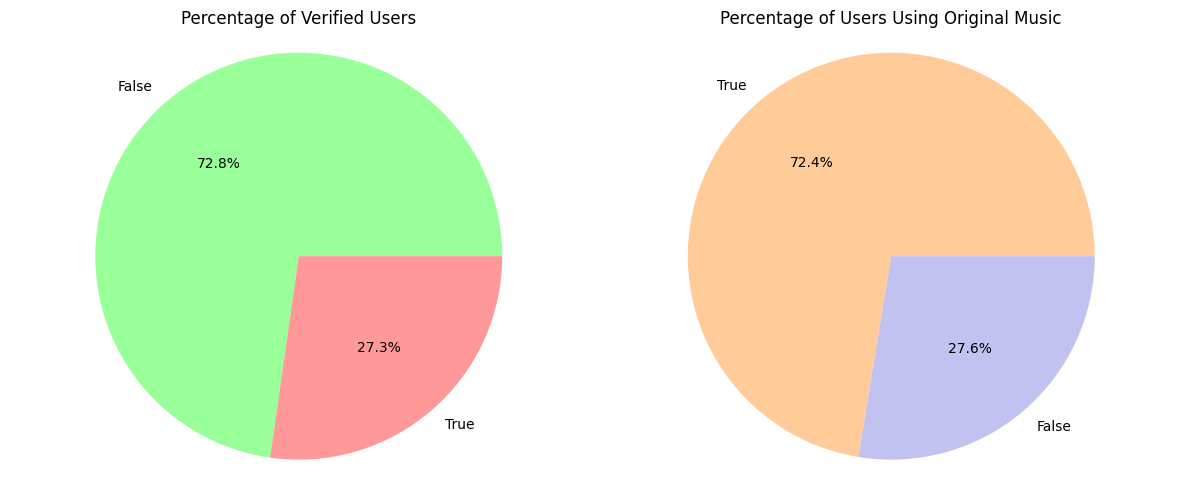

In [21]:
# 9
# Verified user and using original music percentage

import matplotlib.pyplot as plt

# Assuming you've already loaded your data into a DataFrame called 'data'

# Calculate the count of verified and unverified users
verified_counts = data['authorMeta/verified'].value_counts()
music_original_counts = data['musicMeta/musicOriginal'].value_counts()

# Plot the percentage of verified users
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%', colors=['#99ff99', '#ff9999'])
plt.title('Percentage of Verified Users')
plt.axis('equal')

# Plot the percentage of users who use original music
plt.subplot(1, 2, 2)
plt.pie(music_original_counts, labels=music_original_counts.index, autopct='%1.1f%%', colors=['#ffcc99', '#c2c2f0'])
plt.title('Percentage of Users Using Original Music')
plt.axis('equal')

plt.tight_layout()  # Ensures plots don't overlap
plt.show()


Reading Excel File...
Excel File Read Successfully!


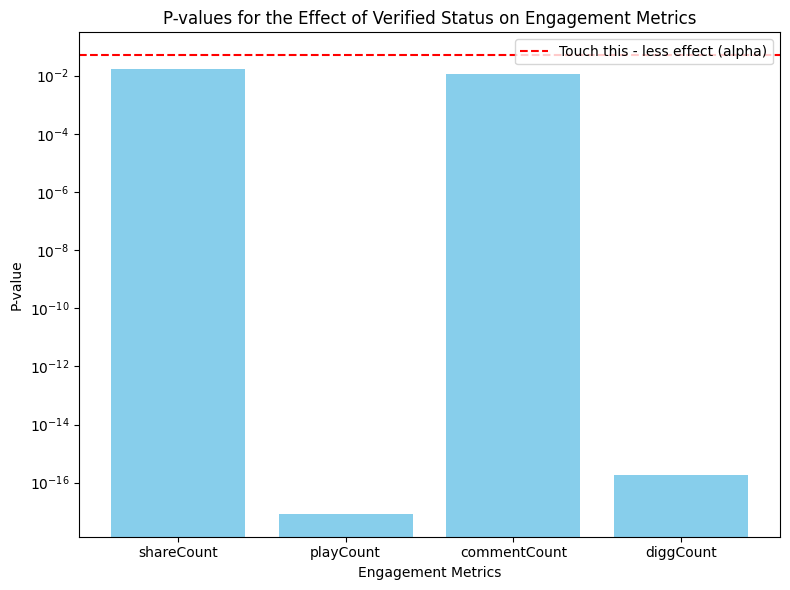

shareCount has a significant positive effect on verified status.
playCount has a significant positive effect on verified status.
commentCount has a significant positive effect on verified status.
diggCount has a significant positive effect on verified status.


In [22]:
# 10
# Verified vs engagement metrics

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'authorMeta/verified', 'shareCount', 'playCount', 'commentCount', 'diggCount'
print("Reading Excel File...")
data = pd.read_excel('E:\\Artificial Intelligence\\Data Analyst\\Project 1 - Tiktok\\Dataset\\cleaned_data.xlsx')
print("Excel File Read Successfully!")

# Create two groups: verified and non-verified authors
verified_authors = data[data['authorMeta/verified'] == True]
non_verified_authors = data[data['authorMeta/verified'] == False]

# Define the engagement metrics for comparison
engagement_metrics = ['shareCount', 'playCount', 'commentCount', 'diggCount']

# Create an empty dictionary to store the results
results = {}

# Perform t-tests for each engagement metric
for metric in engagement_metrics:
    t_statistic, p_value = stats.ttest_ind(verified_authors[metric], non_verified_authors[metric], equal_var=False)
    results[metric] = {
        'Test Statistic': t_statistic,
        'P-value': p_value,
    }

alpha = 0.05  # Set the significance level

# Check the results for each metric and verified status
significant_effects = []
for metric, result in results.items():
    if result['P-value'] < alpha:
        significant_effects.append(metric)

# Plot the p-values for each metric
p_values = [result['P-value'] for metric, result in results.items()]

plt.figure(figsize=(8, 6))
plt.bar(engagement_metrics, p_values, color='skyblue')
plt.xlabel('Engagement Metrics')
plt.ylabel('P-value')
plt.title('P-values for the Effect of Verified Status on Engagement Metrics')
plt.axhline(y=alpha, color='r', linestyle='--', label='Touch this - less effect (alpha)')
plt.legend(loc='best')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Print significant effects and whether the effect is positive or negative
for metric in significant_effects:
    verified_mean = verified_authors[metric].mean()
    non_verified_mean = non_verified_authors[metric].mean()
    effect_type = "positive" if verified_mean > non_verified_mean else "negative"
    print(f'{metric} has a significant {effect_type} effect on verified status.')
